In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
#%matplotlib notebook
sns.set(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats

In [2]:
data = pd.read_pickle('df_tesco_marker_V1.pkl')

In [23]:
data.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso', 'SiteCode', 'SiteName', 'Date',
       'UL 95_ Sales Transaction Volume', 'UL 95_ Approved Price',
       'UL 95_ Marker Price', 'UL 95_ Approved Price Vs Marker Price',
       'ADO_ Sales Transaction Volume', 'ADO_ Approved Price',
       'ADO_ Marker Price', 'ADO_ Approved Price Vs Marker Price',
       'avgUL95VolSite', 'avgADOVolSite', 'diffAdoVol', 'diffUL95Vol',
       'diffAdoVolpct', 'diffUL95Volpct', 'diffAdoPricePct',
       'diffUL95PricePct', 'avgShopSalesFromFuelSiteWise',
       'pctChgShopSalesFromFuel'],
      dtype='object')

In [3]:
data['TotalVol'] = data.volumeADO + data.volumeUL95

In [4]:
data_vol = data.groupby('Site Name')[['TotalVol','volumeADO','volumeUL95']].sum().reset_index()

In [5]:
data_vol['ADO_vol_pct'] = data_vol.volumeADO*100/data_vol['TotalVol']

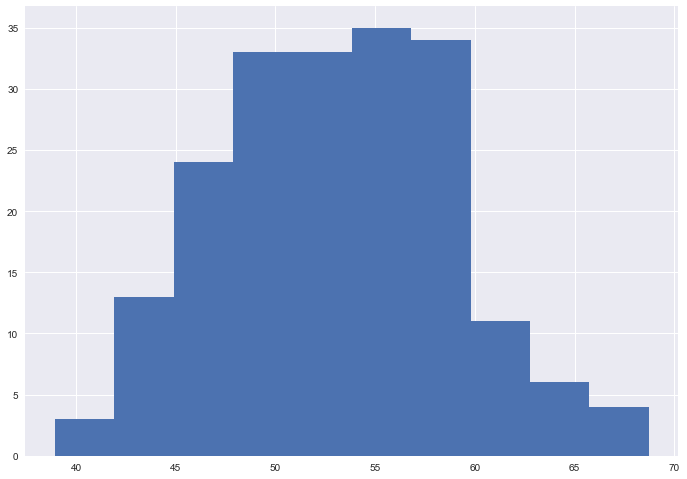

In [6]:
data_vol.ADO_vol_pct.hist()

In [7]:
data_vol.ADO_vol_pct.describe()

count   196.00
mean     53.01
std       5.81
min      38.95
25%      48.93
50%      52.82
75%      57.13
max      68.71
Name: ADO_vol_pct, dtype: float64

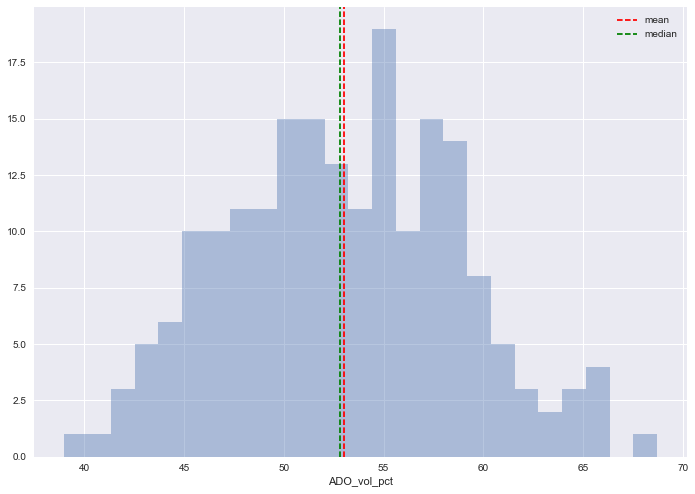

In [8]:
sns.distplot(data_vol['ADO_vol_pct'],kde=False,bins=25)
mean_val = data_vol['ADO_vol_pct'].mean()
median_val = data_vol['ADO_vol_pct'].median()
# #ax_box = sns.boxplot(tesco_data_5.pct_dev)
plt.axvline(mean_val, color='r', linestyle='--',label = 'mean')
plt.axvline(median_val, color='g', linestyle='--',label = 'median')
# # ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# # ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
# # plt.axvline(mean_val, color='r', linestyle='--')
# # plt.axvline(2.44, color='r', linestyle='--')
# # plt.axvline(3.43, color='r', linestyle='--')
# # plt.axvline(4.17, color='g', linestyle='-')
# # plt.axvline(4.93, color='r', linestyle='--')
# # plt.axvline(6.71, color='r', linestyle='--')
# #plt.xlabel('totalVolume in *10^6')
# #plt.xlim(0, 100)
plt.legend()

In [9]:
df_sales = data.groupby('Site Name')[['Total Sales Value','Sales Baskets With Fuel',\
                                     'totalSalesEsso']].sum().reset_index()

df_sales['exclShopSales'] = df_sales['Total Sales Value'] - df_sales['Sales Baskets With Fuel']

df_sales['exclShopSales_ratio'] =  df_sales['exclShopSales']/ df_sales['totalSalesEsso']

In [10]:
df_sales['exclShopSales_ratio'].describe()

count   196.00
mean      0.54
std       0.20
min       0.16
25%       0.41
50%       0.51
75%       0.62
max       1.52
Name: exclShopSales_ratio, dtype: float64

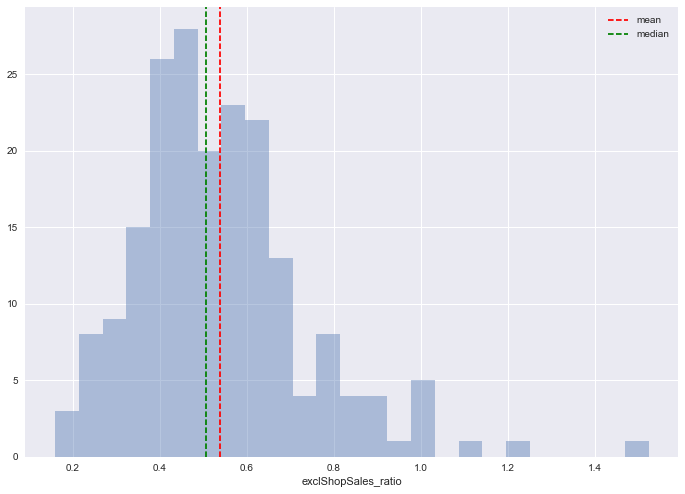

In [11]:
sns.distplot(df_sales['exclShopSales_ratio'],kde=False,bins=25)
mean_val = df_sales['exclShopSales_ratio'].mean()
median_val =df_sales['exclShopSales_ratio'].median()
# #ax_box = sns.boxplot(tesco_data_5.pct_dev)
plt.axvline(mean_val, color='r', linestyle='--',label = 'mean')
plt.axvline(median_val, color='g', linestyle='--',label = 'median')
plt.legend()

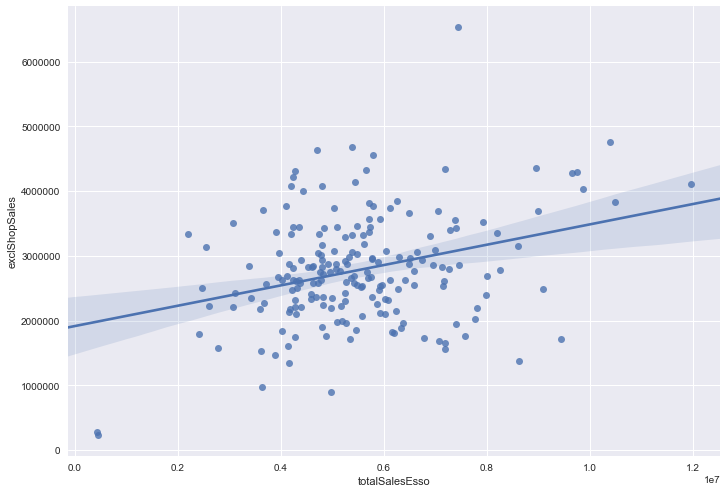

In [12]:
sns.regplot(x="totalSalesEsso", y="exclShopSales", data=df_sales)

In [17]:
df_shopSales = data.groupby('Site Name')[['totalSalesEsso','Sales Baskets With Fuel']].sum().reset_index()
df_shopSales['ShopSalesFromFuel'] = df_shopSales['Sales Baskets With Fuel'] - df_shopSales['totalSalesEsso']
df_shopSales['ShopSalesFromFuel_ratio'] = df_shopSales['ShopSalesFromFuel']/ df_shopSales['totalSalesEsso']
df_shopSales['ShopSalesFromFuel_ratio'].describe()

count   196.00
mean      0.13
std       0.03
min       0.07
25%       0.11
50%       0.13
75%       0.15
max       0.27
Name: ShopSalesFromFuel_ratio, dtype: float64

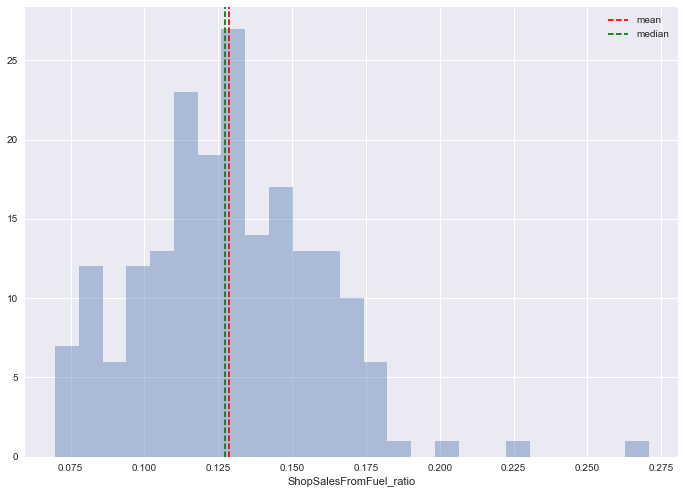

In [18]:
sns.distplot(df_shopSales['ShopSalesFromFuel_ratio'],kde=False,bins=25)
mean_val = df_shopSales['ShopSalesFromFuel_ratio'].mean()
median_val =df_shopSales['ShopSalesFromFuel_ratio'].median()
# #ax_box = sns.boxplot(tesco_data_5.pct_dev)
plt.axvline(mean_val, color='r', linestyle='--',label = 'mean')
plt.axvline(median_val, color='g', linestyle='--',label = 'median')
plt.legend()

In [19]:
df_shopSales['ShopSalesFromFuel_ratio'].describe()

count   196.00
mean      0.13
std       0.03
min       0.07
25%       0.11
50%       0.13
75%       0.15
max       0.27
Name: ShopSalesFromFuel_ratio, dtype: float64

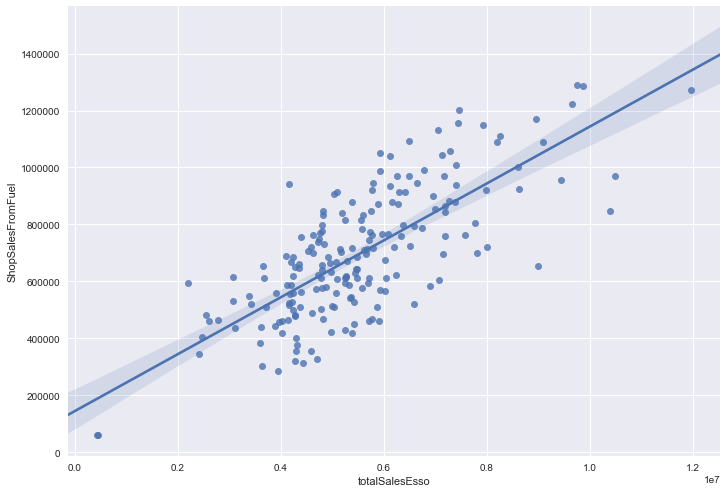

In [20]:
sns.regplot(x="totalSalesEsso", y="ShopSalesFromFuel", data=df_shopSales)

In [21]:
data['ShopSalesFromFuel'] = data['Sales Baskets With Fuel'] - data['totalSalesEsso']
data['ShopSalesFromFuel_ratio'] = data['ShopSalesFromFuel']/ data['totalSalesEsso']

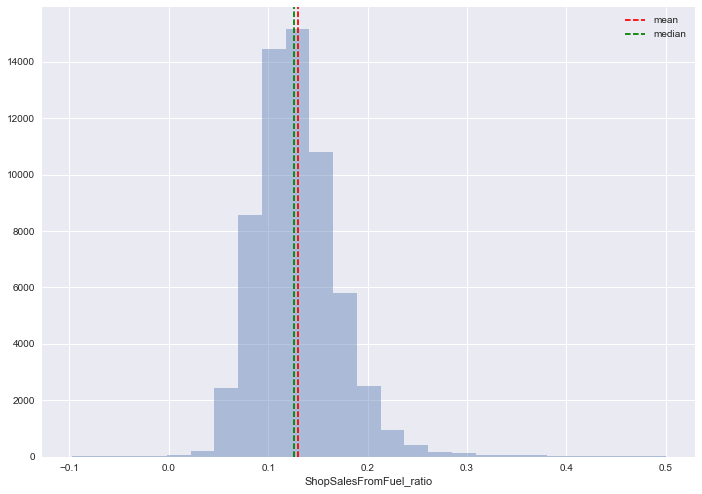

In [22]:
sns.distplot(data['ShopSalesFromFuel_ratio'],kde=False,bins=25)
mean_val = data['ShopSalesFromFuel_ratio'].mean()
median_val =data['ShopSalesFromFuel_ratio'].median()
# #ax_box = sns.boxplot(tesco_data_5.pct_dev)
plt.axvline(mean_val, color='r', linestyle='--',label = 'mean')
plt.axvline(median_val, color='g', linestyle='--',label = 'median')
plt.legend()

In [23]:
data['ShopSalesFromFuel_ratio'].describe()

count   61,990.00
mean         0.13
std          0.04
min         -0.10
25%          0.10
50%          0.13
75%          0.15
max          0.50
Name: ShopSalesFromFuel_ratio, dtype: float64

In [24]:
data['exclShopSales'] = data['Total Sales Value'] - data['Sales Baskets With Fuel']
data['exclShopSales_ratio'] =  data['exclShopSales'] / data['totalSalesEsso']

In [25]:
data['exclShopSales_ratio'].describe()

count   61,990.00
mean         0.55
std          0.33
min          0.00
25%          0.40
50%          0.51
75%          0.65
max         39.85
Name: exclShopSales_ratio, dtype: float64

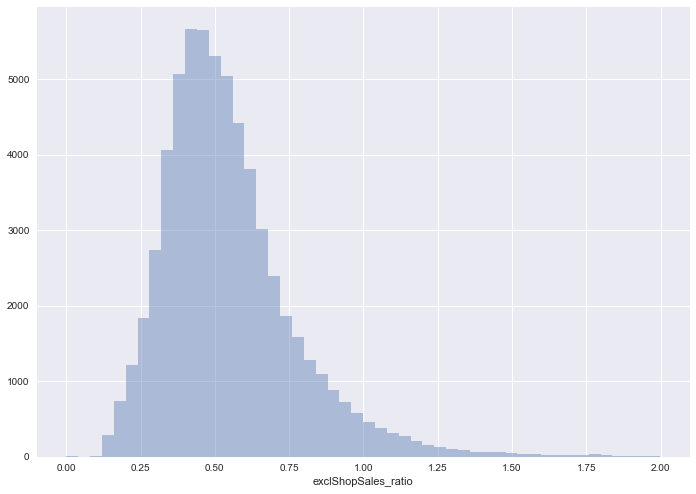

In [26]:
sns.distplot(data.query('exclShopSales_ratio <= 2')['exclShopSales_ratio'],bins=50,kde=False)

(0, 2)

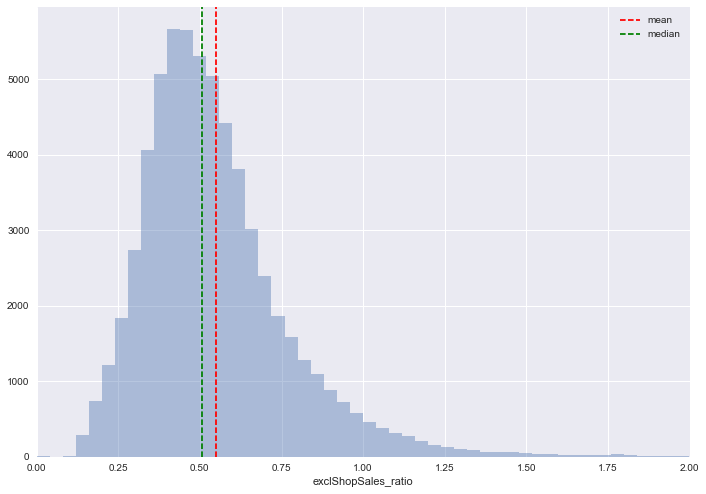

In [27]:
sns.distplot(data.query('exclShopSales_ratio <= 2')['exclShopSales_ratio'],bins=50,kde=False)
mean_val = data['exclShopSales_ratio'].mean()
median_val =data['exclShopSales_ratio'].median()
# #ax_box = sns.boxplot(tesco_data_5.pct_dev)
plt.axvline(mean_val, color='r', linestyle='--',label = 'mean')
plt.axvline(median_val, color='g', linestyle='--',label = 'median')
plt.legend()
plt.xlim(0, 2)

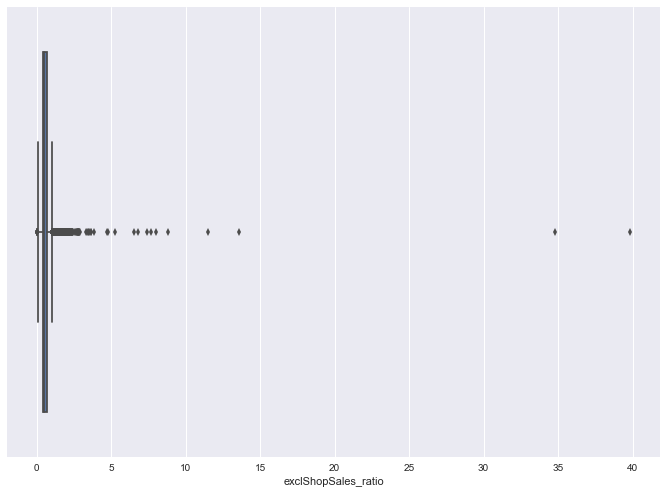

In [110]:
sns.boxplot(data['exclShopSales_ratio'])

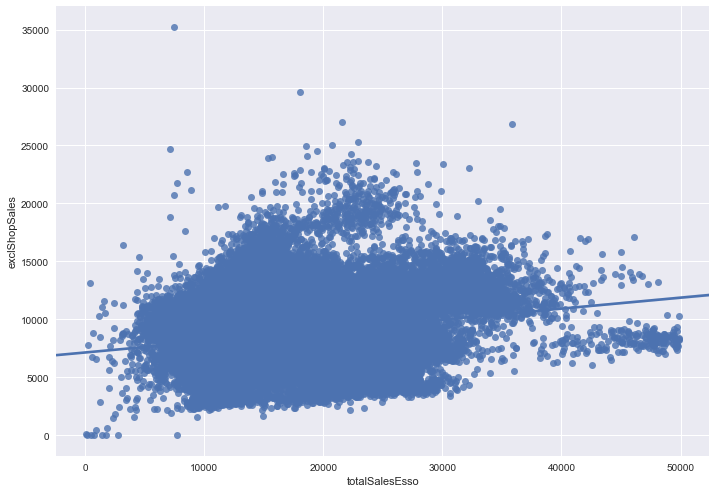

In [28]:
sns.regplot(x="totalSalesEsso", y="exclShopSales", data=data)

In [114]:
(data['exclShopSales_ratio']*100).describe()

count   61,990.00
mean        55.06
std         33.08
min          0.00
25%         39.58
50%         50.67
75%         64.71
max      3,984.98
Name: exclShopSales_ratio, dtype: float64

In [37]:
data['exclShopSales'] = data['Total Sales Value'] - data['Sales Baskets With Fuel']
data['exclShopSales_ratio'] =  data['exclShopSales']/ data['totalSalesEsso']

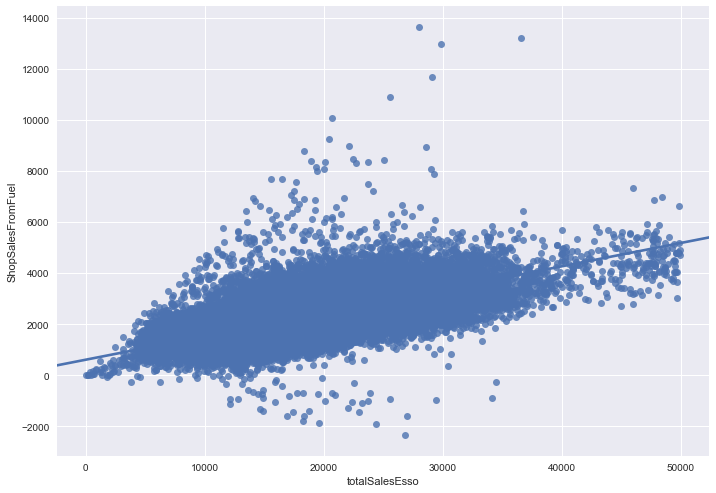

In [30]:
sns.regplot(x="totalSalesEsso", y="ShopSalesFromFuel", data=data)#data['exclShopSales']

In [ ]:
# data['exclShopSales'] = data['Total Sales Value'] - data['Sales Baskets With Fuel']
# data['exclShopSales_ratio'] =  data['exclShopSales'] / data['totalSalesEsso']

In [31]:
data.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso', 'SiteCode', 'SiteName', 'Date',
       'UL 95_ Sales Transaction Volume', 'UL 95_ Approved Price',
       'UL 95_ Marker Price', 'UL 95_ Approved Price Vs Marker Price',
       'ADO_ Sales Transaction Volume', 'ADO_ Approved Price',
       'ADO_ Marker Price', 'ADO_ Approved Price Vs Marker Price',
       'avgUL95VolSite', 'avgADOVolSite', 'diffAdoVol', 'diffUL95Vol',
       'diffAdoVolpct', 'diffUL95Volpct', 'diffAdoPricePct',
       'diffUL95PricePct', 'avgShopSalesFromFuelSiteWise',
       'pctChgShopSalesFromFuel', 'TotalVol', 'ShopSalesFromFuel',
       'ShopSalesFromFuel_ratio', 'exclShopSales', 'exclShopSales_ratio'],
      dtype='object')

In [32]:
data['avgExclShopSalesSiteWise'] = data.groupby('PBL')['exclShopSales'].transform('mean')
data['exclShopSalesPctChgFromAvg'] = (data['exclShopSales'] / data['avgExclShopSalesSiteWise']-1)*100

data['AdoApprPriceChgPct'] =  (data['ADO_ Approved Price'] / data['ADO_ Marker Price']-1)*100
data['UL95AppPriceChgPct'] = (data['UL 95_ Approved Price'] / data['UL 95_ Marker Price']-1)*100

In [62]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['AdoApprPriceChgPct'],\
                                                          x['exclShopSalesPctChgFromAvg'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regExclShopSalesVsAppPriceADO_pct = data.groupby('Site Name').apply(regRes).reset_index()

regExclShopSalesVsAppPriceADO_pct_sig = regExclShopSalesVsAppPriceADO_pct.query('pvalue <= 0.05')

regShopSalesVsAppPriceADO_pct_sig.shape

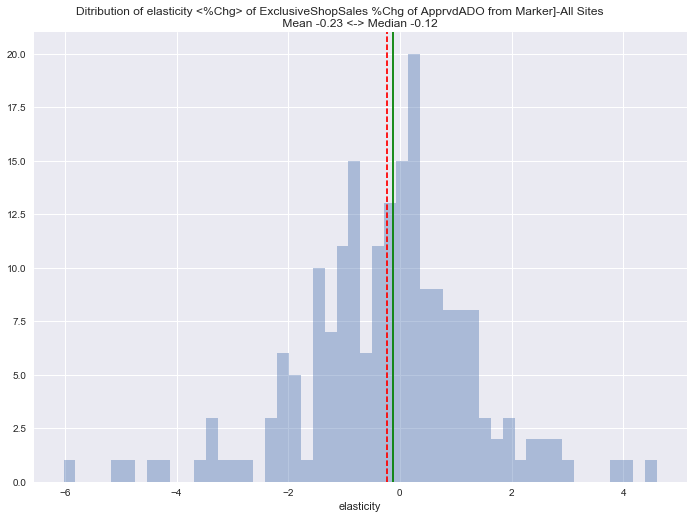

In [65]:
sns.distplot(regExclShopSalesVsAppPriceADO_pct.slope,kde=False,bins=50)
mean_slope = regExclShopSalesVsAppPriceADO_pct['slope'].mean()
median_slope = regExclShopSalesVsAppPriceADO_pct['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <%Chg> of ExclusiveShopSales %Chg of ApprvdADO from Marker]-All Sites  \
          \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

In [ ]:
# data['ShopSalesFromFuel'] = data['Sales Baskets With Fuel'] - data['totalSalesEsso']
# data['ShopSalesFromFuel_ratio'] = data['ShopSalesFromFuel']/ data['totalSalesEsso']

In [68]:
data['avgShopSalesFromFuelSiteWise'] = data.groupby('PBL')['ShopSalesFromFuel'].transform('mean')
data['avgShopSalesFromFuelPctChg'] = (data['ShopSalesFromFuel'] / data['avgShopSalesFromFuelSiteWise']-1)*100

In [69]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['AdoApprPriceChgPct'],\
                                                          x['avgShopSalesFromFuelPctChg'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regShopSalesFromFuelVsAppPriceADO_pct = data.groupby('Site Name').apply(regRes).reset_index()

regShopSalesFromFuelVsAppPriceADO_pct_sig = regShopSalesFromFuelVsAppPriceADO_pct.query('pvalue <= 0.05')

regShopSalesFromFuelVsAppPriceADO_pct_sig.shape

(65, 6)

(-10, 10)

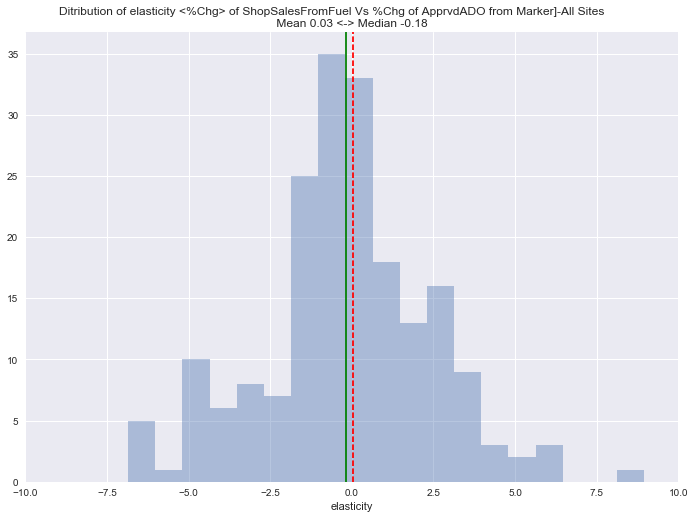

In [73]:
sns.distplot(regShopSalesFromFuelVsAppPriceADO_pct.slope,kde=False,bins=50)
mean_slope = regShopSalesFromFuelVsAppPriceADO_pct['slope'].mean()
median_slope = regShopSalesFromFuelVsAppPriceADO_pct['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <%Chg> of ShopSalesFromFuel Vs %Chg of ApprvdADO from Marker]-All Sites  \
          \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.xlim(-10, 10)

(-10, 10)

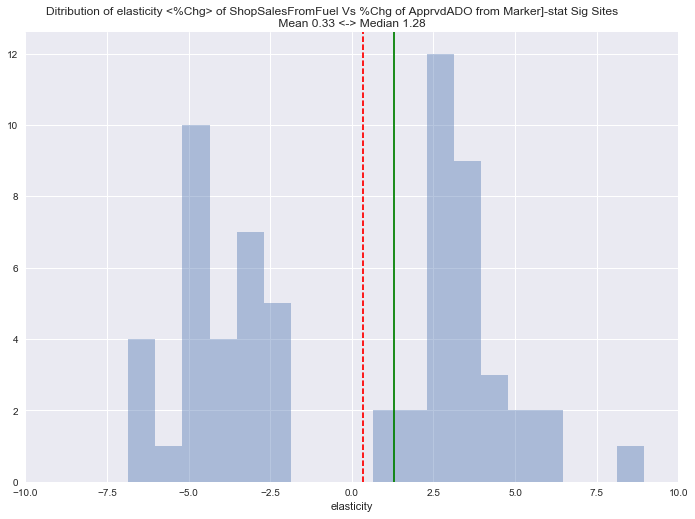

In [79]:
sns.distplot(regShopSalesFromFuelVsAppPriceADO_pct_sig.slope,kde=False,bins=50)
mean_slope = regShopSalesFromFuelVsAppPriceADO_pct_sig['slope'].mean()
median_slope = regShopSalesFromFuelVsAppPriceADO_pct_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <%Chg> of ShopSalesFromFuel Vs %Chg of ApprvdADO from Marker]-stat Sig Sites  \
          \n Mean {} <-> Median {} '.format(round(mean_slope,2),round(median_slope,2)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.xlim(-10, 10)

In [87]:
def regRes(x):
    slope,intercept,rvalu,pvalue,stderr= stats.linregress(x['ADO_ Approved Price Vs Marker Price'],\
                                                          x['ShopSalesFromFuel'])
    return(pd.Series([slope,intercept,rvalu,pvalue,stderr],\
                     index=['slope','intercept','rvalu','pvalue','stderr']))

regShopSalesFromFuelVsAppPriceADO = data.groupby('Site Name').apply(regRes).reset_index()

regShopSalesFromFuelVsAppPriceADO_sig = regShopSalesFromFuelVsAppPriceADO.query('pvalue <= 0.05')

regShopSalesFromFuelVsAppPriceADO_sig.shape

(63, 6)

(-150, 200)

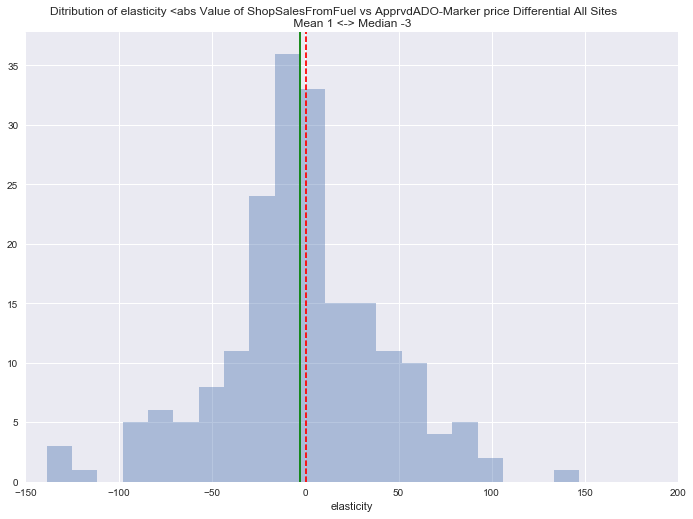

In [88]:
sns.distplot(regShopSalesFromFuelVsAppPriceADO.slope,kde=False,bins=50)
mean_slope = regShopSalesFromFuelVsAppPriceADO['slope'].mean()
median_slope = regShopSalesFromFuelVsAppPriceADO['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value of ShopSalesFromFuel vs ApprvdADO-Marker price Differential All Sites \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.xlim(-150, 200)

(-150, 200)

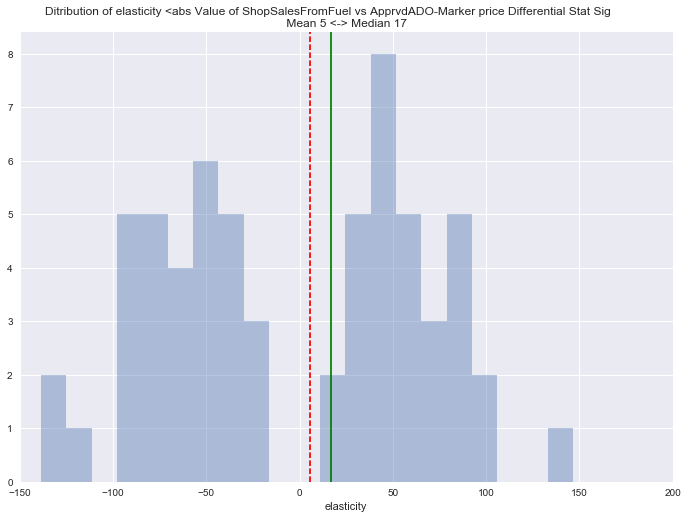

In [90]:
sns.distplot(regShopSalesFromFuelVsAppPriceADO_sig.slope,kde=False,bins=50)
mean_slope = regShopSalesFromFuelVsAppPriceADO_sig['slope'].mean()
median_slope = regShopSalesFromFuelVsAppPriceADO_sig['slope'].median()
#ax_box = sns.boxplot(tesco_data_5.pct_dev)
# ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
# ax_box.axvline(median_pct_dev, color='g', linestyle='-')
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.axvline(mean_slope, color='r', linestyle='--')
plt.axvline(median_slope, color='g', linestyle='-')
plt.xlabel('elasticity')
plt.title('Ditribution of elasticity <abs Value of ShopSalesFromFuel vs ApprvdADO-Marker price Differential Stat Sig \
          \n Mean {} <-> Median {} '.format(round(mean_slope),round(median_slope)))
# ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})
plt.xlim(-150, 200)